In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
from data import data_dict, DIRECTORY
import pandas as pd
import numpy as np

print(data_dict)
test_data = data_dict['fake']
test_data = pd.read_csv(test_data)

for idx in range(len(test_data)):
    test_data['text'][idx] = str(test_data['title'][idx]) + ' ' + str(test_data['text'][idx])

print(test_data['type'].unique())

{'fake': 'data/fake.csv', 'political_social_media': 'data/political_social_media.csv', 'politifact': 'data/truth-detectiondeception-detectionlie-detection/politifact.csv', 'news_articles': 'data/news_articles.csv', 'politifact_clean': 'data/truth-detectiondeception-detectionlie-detection/politifact_clean.csv', 'politifact_clean_binarized': 'data/truth-detectiondeception-detectionlie-detection/politifact_clean_binarized.csv'}


<ipython-input-4-1e7cbd108aea>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'][idx] = str(test_data['title'][idx]) + ' ' + str(test_data['text'][idx])


['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state']


In [5]:
test_data.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Muslims BUSTED: They Stole Millions In Gov’t B...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Re: Why Did Attorney General Loretta Lynch Ple...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,BREAKING: Weiner Cooperating With FBI On Hilla...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


{'new': 12688, '–': 12954, 'hillary': 13326, 'us': 15502, 'people': 16113, 'one': 16694, 'clinton': 17118, 'would': 17847, 'trump': 17981, '': 21174}


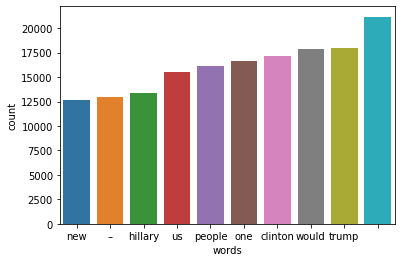

In [63]:
import nltk
from nltk.corpus import stopwords
import itertools

def word_freq(text_data):
    all_words = {}

    for entry in text_data:
        formatted = entry.split(' ')
        for word in formatted:
            word_key = word.lower()
            all_words[word_key] = 0

    real_dict = {key: 0 for key in all_words.keys()}

    for entry in text_data:
        formatted = entry.split(' ')
        for word in formatted:
            word_key = word.lower()
            real_dict[word_key] += 1

    # print(real_dict)

    y_data = list(test_data['type'])


    real_dict = {k: v for k, v in sorted(real_dict.items(), key=lambda item: item[1])}
    highest_words = list(real_dict.keys())

    all_stopwords = list(stopwords.words('english'))
    all_stopwords.append(['the', 'and', 'but', 'can', 'be', 'could', 'would', 'should', '-', '', ' ', 'one', 'as', 'such'])
    for stopword in all_stopwords:
        try:
            highest_words.remove(stopword)
        except:
            pass

    a = int(input())
    top_words = {key: real_dict[key] for key in highest_words[-a:]}
    words = list(top_words.keys())
    counts = list(top_words.values())
    df = pd.DataFrame(list(zip(words, counts)), columns=['words', 'count'])
    df.head()
    sns.barplot(x="words", y="count", data=df)
    print(top_words)

word_freq(test_data['text'])
